# **Importing the initial needed libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Importing the dataset
df = pd.read_csv('/content/advertising.csv')

# **Exploring the General information of the dataset** #

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,1000.0,65.00020,15.853615,32.60,51.3600,68.215,78.5475,91.43
Age,1000.0,36.00900,8.785562,19.00,29.0000,35.000,42.0000,61.00
Area Income,1000.0,55000.00008,13414.634022,13996.50,47031.8025,57012.300,65470.6350,79484.80
Daily Internet Usage,1000.0,180.00010,43.902339,104.78,138.8300,183.130,218.7925,269.96
Male,1000.0,0.48100,0.499889,0.00,0.0000,0.000,1.0000,1.00
Clicked on Ad,1000.0,0.50000,0.500250,0.00,0.0000,0.500,1.0000,1.00


In [ ]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
#Parsing the Timestamp feature into Month, year, day, and hour
df['Month'] = pd.to_datetime(df['Timestamp']).dt.month_name()
df['Day'] = pd.to_datetime(df['Timestamp']).dt.day_name()
df['Year'] = pd.to_datetime(df['Timestamp']).dt.year
df['Hour'] = pd.to_datetime(df['Timestamp']).dt.hour


# **Exploratory Data Analysis**

*Univariate Analysis*

In [ ]:
#extracting the numerical and categorical features
num_feat = df.select_dtypes(include=['float','int']).columns.tolist()
cat_feat = df.select_dtypes(include=['object']).columns.tolist()

Number of people who clicked on ad : 500 (50.0% of the data) 
Number of people who didnt click on ad : 500 (50.0% of the data) 


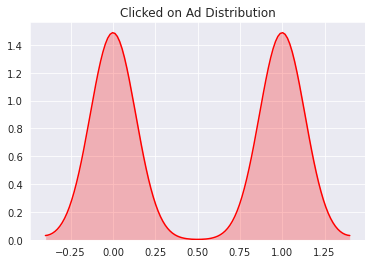

In [ ]:
#Checking the distribution of our dependent variable, Clicked on Ad
sns.set_style('darkgrid')
g = sns.kdeplot(df['Clicked on Ad'], color='r', shade=True, legend=False)
g.set_title('Clicked on Ad Distribution')
print('Number of people who clicked on ad : {} ({}% of the data) '.format(df['Clicked on Ad'].value_counts()[0],df['Clicked on Ad'].value_counts()[0]/1000*100))
print('Number of people who didnt click on ad : {} ({}% of the data) '.format(df['Clicked on Ad'].value_counts()[0],df['Clicked on Ad'].value_counts()[1]/1000*100))

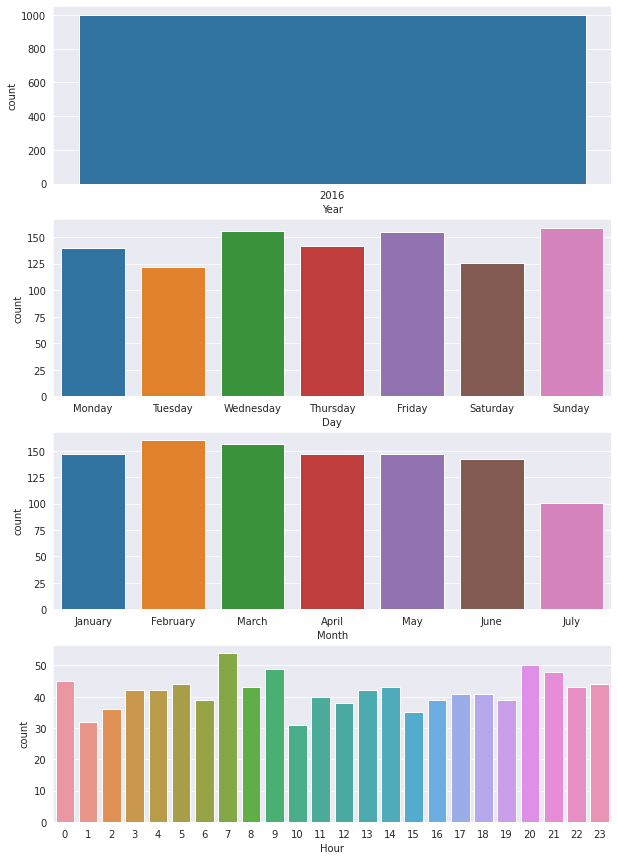

In [ ]:
#The two classification have equal distribution and is perfectly symmetrical

#Year, Day, Month, and Hour

yyddmmhh = ['Year','Day','Month','Hour']

g,axes = plt.subplots(4,1, figsize=(10,15))
  
for i in range(0,4):
  if yyddmmhh[i]=='Day':
     sns.countplot(df[yyddmmhh[i]], ax=axes[i], order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
  elif yyddmmhh[i]=='Month':
     sns.countplot(df[yyddmmhh[i]], ax=axes[i], order=['January','February','March','April','May','June','July'])
  else:
     sns.countplot(df[yyddmmhh[i]], ax=axes[i])


In [ ]:
#Since the year has only one value, that year feature will be dropped
#looks like the features above have good distribution
df.drop(['Year'],axis=1,inplace=True)


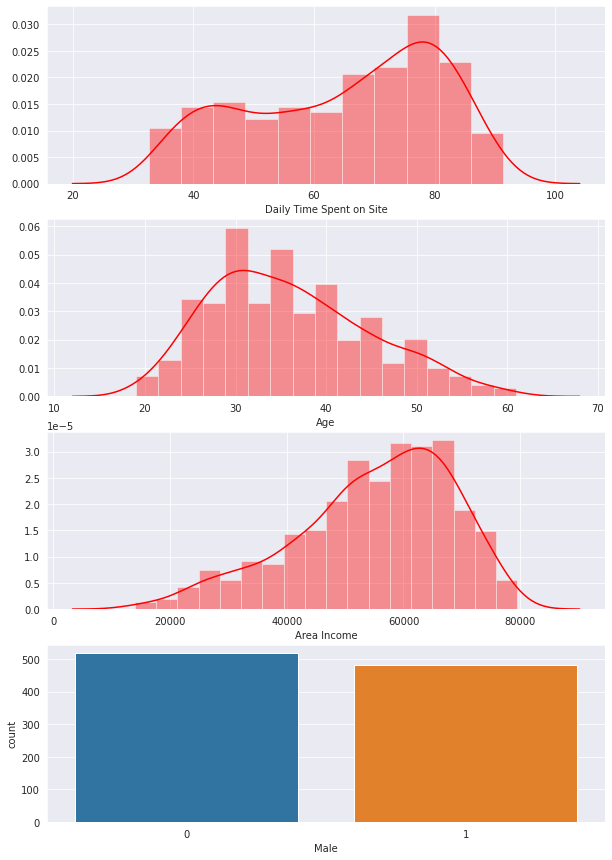

In [ ]:
#getting the distribution of other features as well

g,axes = plt.subplots(4,1, figsize=(10,15))
  
for i in range(0,4):
  sns.distplot(df[df.columns[i]], ax=axes[i],color='red')
sns.countplot(df['Male'])

In [ ]:
#most users spend time on the website for 65-85 mins
#Most users in the dataset are within the age of 30-40 years old
#The sex feature are almost perfectly distributed too, but there are quite more females in this dataset

In [ ]:
#Analysis for the city and country
print('There are {} unique items for the city feature'.format(df['City'].nunique()))
print('There are {} unique items for the country feature'.format(df['Country'].nunique()))


There are 969 unique items for the city feature
There are 237 unique items for the country feature


In [ ]:
#The city feature in the dataset would be dropped due to numerous numbers of unique items.
#For the country feature, we will try to analyze it by dividing it into continents

In [ ]:
#installing the needed library
%pip install pycountry-convert

In [ ]:
import pycountry_convert as pc

def country_to_continent(country_name):
  try:
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name
  except KeyError as e:
    return 'Others'

df['Continent'] = df['Country'].apply(country_to_continent)

In [ ]:
#Those countries that aren't found in the country dictionary are returned as "others" (e.g. Palestinian Territory)
df['Continent'].value_counts()

Asia             211
Europe           203
Africa           192
North America    153
Oceania          100
Others            74
South America     64
Antarctica         3
Name: Continent, dtype: int64

In [ ]:
#Dropping the City and Country Features
df.drop(['Country','City'],axis=1,inplace=True)

In [ ]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,Male,Timestamp,Clicked on Ad,Month,Day,Hour,Continent
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,0,2016-03-27 00:53:11,0,March,Sunday,0,Africa
1,80.23,31,68441.85,193.77,Monitored national standardization,1,2016-04-04 01:39:02,0,April,Monday,1,Oceania
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,0,2016-03-13 20:35:42,0,March,Sunday,20,Europe
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,1,2016-01-10 02:31:19,0,January,Sunday,2,Europe
4,68.37,35,73889.99,225.58,Robust logistical utilization,0,2016-06-03 03:36:18,0,June,Friday,3,Europe


*Bivariate Analysis*

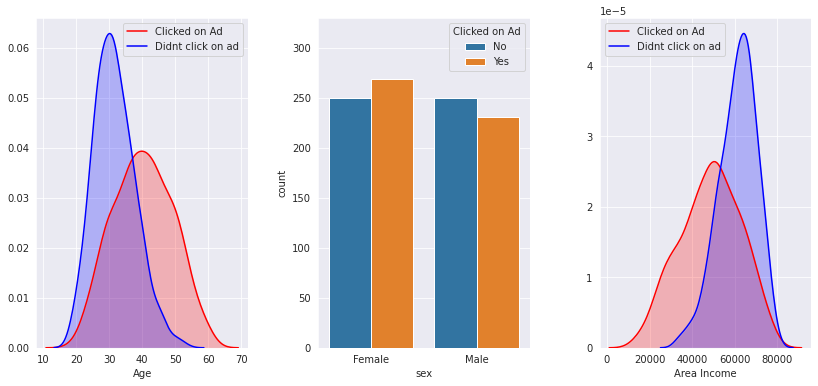

In [ ]:
c,axes = plt.subplots(1,3, figsize=(12,6))

g = sns.kdeplot(df[df['Clicked on Ad']==1]['Age'], color='r',shade = True,ax=axes[0])
g = sns.kdeplot(df[df['Clicked on Ad']==0]['Age'], color='b',shade = True,ax=axes[0])
g.set_xlabel('Age')
g.legend(['Clicked on Ad','Didnt click on ad'])

g2 = sns.countplot(df['Male'], hue='Clicked on Ad',data=df,ax=axes[1])
g2.set_xticklabels(labels=['Female','Male'])
g2.set_xlabel('sex')
ylimit = g2.set_ylim(0,330)
plt.setp(g2.get_legend().get_texts(), fontsize='10') # for legend text
plt.setp(g2.get_legend().get_title(), fontsize='10')
g2.legend(title='Clicked on Ad',labels=['No','Yes'])

g = sns.kdeplot(df[df['Clicked on Ad']==1]['Area Income'], color='r',shade = True,ax=axes[2])
g = sns.kdeplot(df[df['Clicked on Ad']==0]['Area Income'], color='b',shade = True,ax=axes[2])
g.set_xlabel('Area Income')
g.legend(['Clicked on Ad','Didnt click on ad'])
c.tight_layout(pad=3.0)

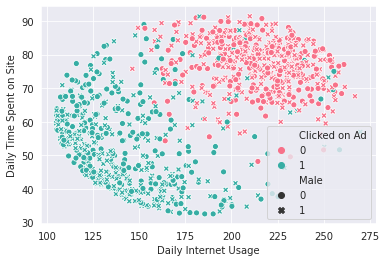

In [ ]:
# Older people tend to click on the ad
# A bit more female tend to click the ad compared to the male
# More area income -> ignore the ad
sns.scatterplot(x='Daily Internet Usage',y='Daily Time Spent on Site', hue='Clicked on Ad', style='Male', data=df,color='r',palette='husl')

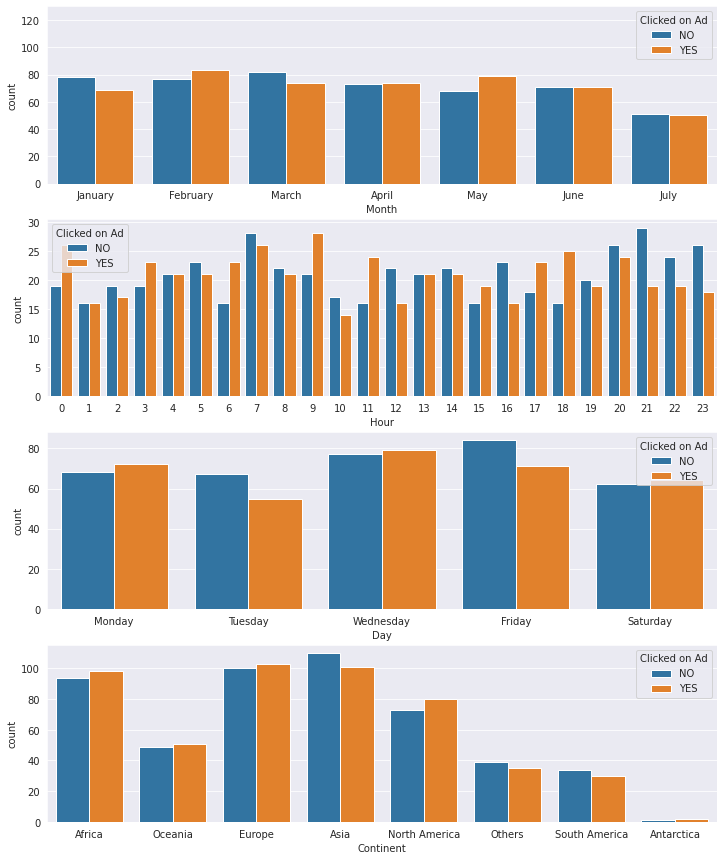

In [ ]:
#The relationship of Daily internet usage and Daily Time Spent on Size possess linear relationship
#People that use the internet more have more time in spending their time in the site
#The figure shows that majority of the people clicked on the ad lies on the 3rd quadrant of the figure.

c,axes = plt.subplots(4,1,figsize=(12,15))
g = sns.countplot('Month',order=['January','February','March','April','May','June','July'],hue='Clicked on Ad',data=df, ax=axes[0])
g.legend(title='Clicked on Ad',labels=['NO','YES'], loc='best')
g.set_ylim(0,130)

g1 = sns.countplot('Hour',hue='Clicked on Ad',data=df, ax=axes[1])
g1.legend(title='Clicked on Ad',labels=['NO','YES'], loc='best')

g2 = sns.countplot('Day',order=['Monday','Tuesday','Wednesday','Friday','Saturday'],hue='Clicked on Ad',data=df, ax=axes[2])
g2.legend(title='Clicked on Ad',labels=['NO','YES'], loc='best')

g3 = sns.countplot('Continent',hue='Clicked on Ad',data=df, ax=axes[3])
g3.legend(title='Clicked on Ad',labels=['NO','YES'], loc='best')

*Multivariate Analysis*

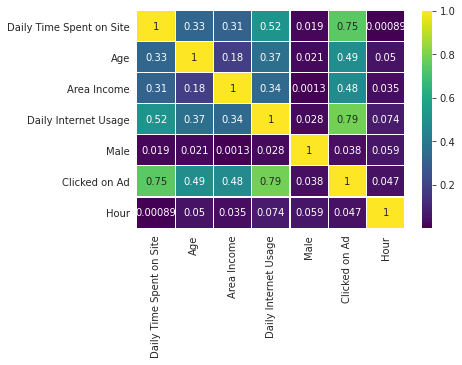

In [ ]:
#plotting the correlation heatmap
sns.heatmap(abs(df.corr()),cmap='viridis',annot=True,linewidth='0.1',linecolor='w')

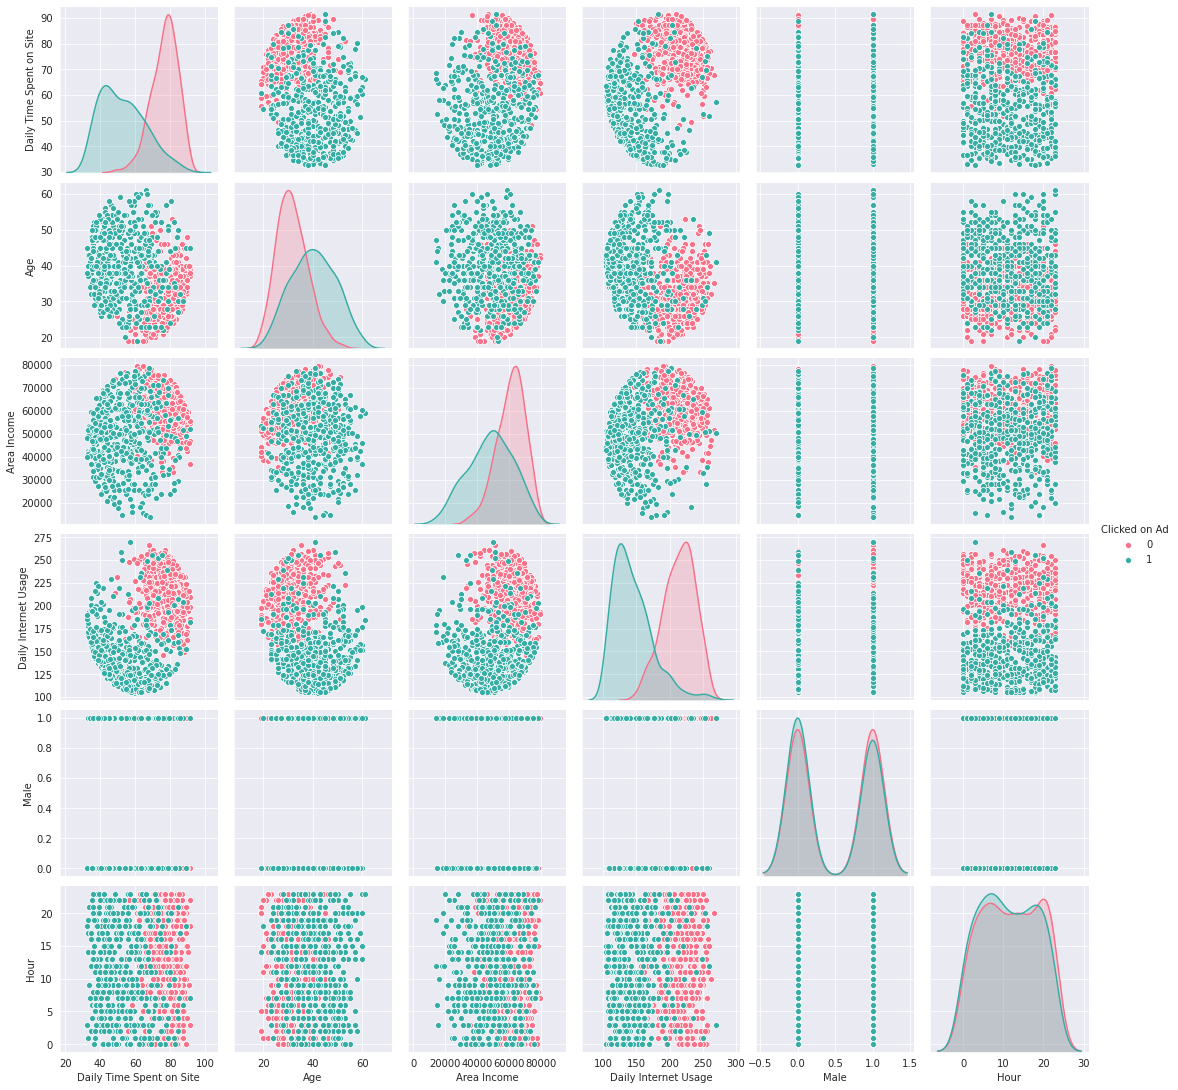

In [ ]:
#Our dependent variable is greatly correlated with, Daily Time Spend on site, Daily Internet Usage, Age, and Area Income

#plotting the pairplot
sns.pairplot(df,hue='Clicked on Ad', palette='husl')

In [ ]:
#The lower the Daily Time Spent on side and Daily internet usage, the likelier it is to click the ad
#The higher the age, the likelier to click the ad
#the lower the area income, the likelier to click the ad

# **Missing Data**

In [ ]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
Male                        0
Timestamp                   0
Clicked on Ad               0
Month                       0
Day                         0
Hour                        0
Continent                   0
dtype: int64

In [ ]:
#There are no missing data

# **Converting the Categorical Variables to Dummy variables**

In [ ]:
df = pd.get_dummies(columns = ['Month','Day','Continent'], drop_first=True, data=df)
x = df.drop(['Timestamp','Clicked on Ad'],axis=1)
y = df['Clicked on Ad']

# **Natural Language Processing for the Ad Topic Line Feature**

In [ ]:
#We will create another independent variable set dataframe to see if the NLP will improve the models in the future

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, len(df)):
    ad = re.sub('[^a-zA-Z]', ' ' ,df["Ad Topic Line"][i])
    ad = ad.lower()
    ad = ad.split()
    ps = PorterStemmer()
    ad = [ps.stem(word) for word in ad if not word in set(stopwords.words('english'))]
    ad = ' '.join(ad)
    corpus.append(ad)

#Creating Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500,)
xNLP = cv.fit_transform(corpus)
count_vect_df = pd.DataFrame(xNLP.todense(), columns=cv.get_feature_names())

xNLP = pd.concat([x, count_vect_df], axis=1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Feature Scaling for scale invariant models**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_XNLP = StandardScaler()
num_feat = ['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Hour','Male']
x[num_feat] = sc_X.fit_transform(x[num_feat])
x.drop('Ad Topic Line',axis=1,inplace=True)
xNLP[num_feat] = sc_XNLP.fit_transform(xNLP[num_feat])
xNLP.drop('Ad Topic Line',axis=1,inplace=True)

In [ ]:
xNLP.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Hour,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Continent_Antarctica,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_Others,Continent_South America,abil,access,actuat,ad,adapt,administr,advanc,algorithm,allianc,alon,amelior,analyz,applic,approach,architect,...,synerg,synergi,synergist,system,systemat,tangibl,task,team,tertiari,thgener,think,throughput,tier,time,toler,toolset,total,transit,trend,tripl,uniform,univers,upgrad,upward,user,util,valu,versatil,virtual,vision,visionari,volatil,warehous,web,websit,well,wide,workforc,worthi,zero
0,0.249267,-0.114905,0.509691,1.734030,-0.962695,-1.675896,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.961132,-0.570425,1.002530,0.313805,1.038750,-1.532166,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.282083,-1.139826,0.356949,1.287589,-0.962695,1.198711,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.577432,-0.798185,-0.014456,1.501580,1.038750,-1.388436,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.212664,-0.114905,1.408868,1.038731,-0.962695,-1.244705,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **Modelling the Data**

In [ ]:
#Comparing the CV score of the basic models
models = []
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import StratifiedKFold,cross_val_score

models.append(LogisticRegression(random_state=42))
models.append(KNeighborsClassifier(n_neighbors=30))
models.append(SVC(random_state=42))
models.append(GaussianNB())
models.append(DecisionTreeClassifier(random_state=42))
models.append(RandomForestClassifier(random_state=42))
models.append(XGBClassifier(random_state=42))
models.append(AdaBoostClassifier(random_state=42))
models.append(GradientBoostingClassifier(random_state=42))
models.append(ExtraTreesClassifier(random_state=42))

cv_scores = []
cv_scoresNLP = []

for model in models:
  cv_scores.append(cross_val_score(model, x, y, cv=StratifiedKFold(n_splits=10), scoring='accuracy'))
  cv_scoresNLP.append(cross_val_score(model, xNLP, y, cv=StratifiedKFold(n_splits=10), scoring='accuracy'))


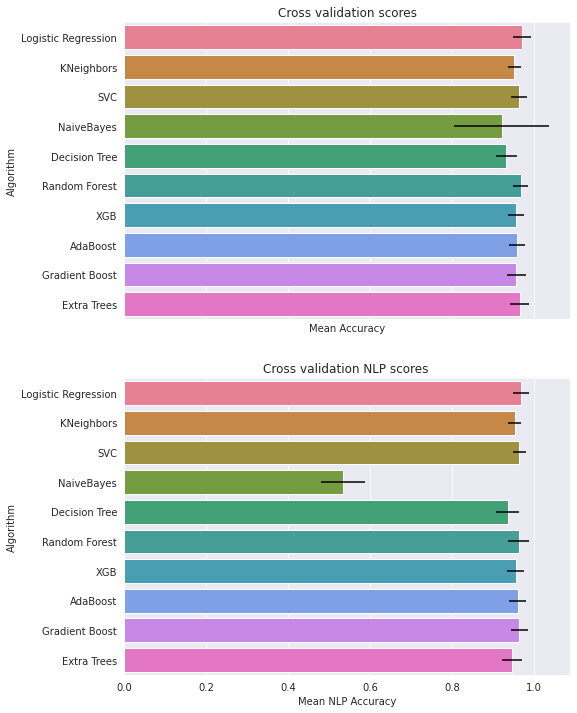

In [ ]:
cvmean=[]
cvstd=[]

cvNLPmean=[]
cvNLPstd=[]
for cv in cv_scores:
  cvmean.append(cv.mean())
  cvstd.append(cv.std())

for cvNLP in cv_scoresNLP:
  cvNLPmean.append(cvNLP.mean())
  cvNLPstd.append(cvNLP.std())

cvresults = pd.DataFrame({'Algorithm':['Logistic Regression','KNeighbors','SVC','NaiveBayes','Decision Tree','Random Forest','XGB','AdaBoost','Gradient Boost','Extra Trees'],'Mean Accuracy': cvmean,'std Accuracy': cvstd, 'Mean NLP Accuracy': cvNLPmean,'std NLP Accuracy': cvNLPstd})

g,axes = plt.subplots(2,1, figsize=(8,12),sharex=True)
g1 = sns.barplot("Mean Accuracy","Algorithm",data = cvresults, palette="husl",orient = "h",**{'xerr':cvstd},ax=axes[0])
axes[0].set_xlabel("Mean Accuracy")
g1 = axes[0].set_title("Cross validation scores")

g2 = sns.barplot("Mean NLP Accuracy","Algorithm",data = cvresults, palette="husl",orient = "h",**{'xerr':cvNLPstd},ax=axes[1])
axes[1].set_xlabel("Mean NLP Accuracy")
g2 = axes[1].set_title("Cross validation NLP scores ")

In [ ]:
#Top 5 for the dataset with and without NLP
cvresults.loc[cvresults['Mean Accuracy'].nlargest(5).index]

,Algorithm,Mean Accuracy,std Accuracy,Mean NLP Accuracy,std NLP Accuracy
0,Logistic Regression,0.970,0.021909,0.968,0.019391
5,Random Forest,0.967,0.018466,0.962,0.024819
9,Extra Trees,0.965,0.023770,0.947,0.024104
2,SVC,0.963,0.019519,0.964,0.016248
7,AdaBoost,0.958,0.019900,0.960,0.020000


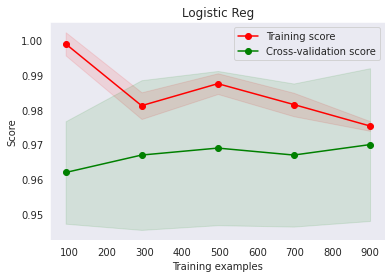

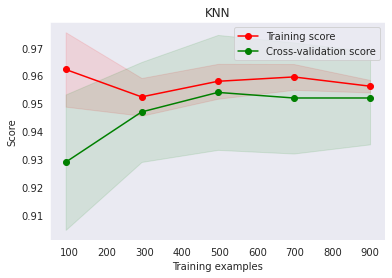

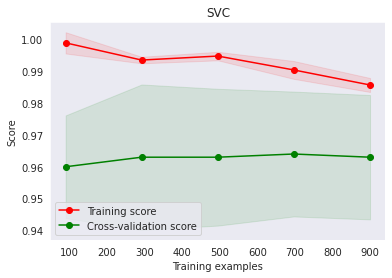

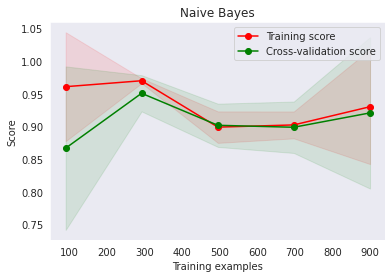

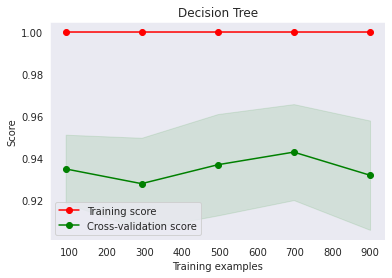

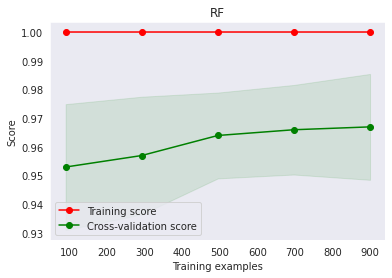

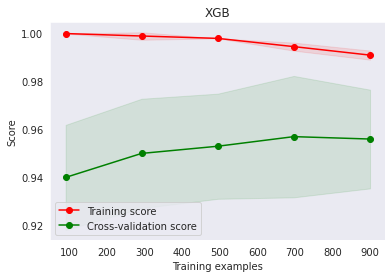

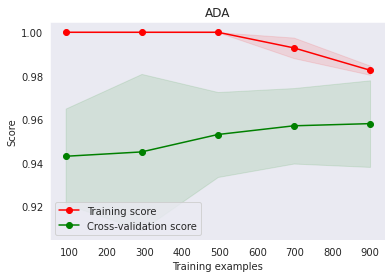

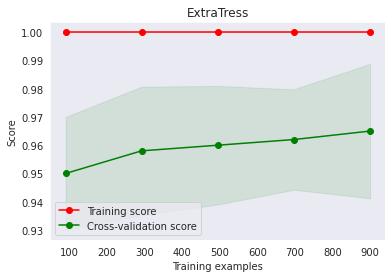

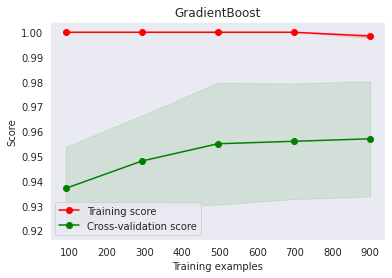

In [ ]:
from sklearn.model_selection import learning_curve

kfold = StratifiedKFold(n_splits=10)


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

#Plotting the learning curve for the dataset without NLP
g = plot_learning_curve(LogisticRegression(random_state=42),"Logistic Reg",x,y,cv=kfold)
g = plot_learning_curve(KNeighborsClassifier(n_neighbors=30),"KNN",x,y,cv=kfold)
g = plot_learning_curve(SVC(random_state=42),"SVC",x,y,cv=kfold)
g = plot_learning_curve(GaussianNB(),"Naive Bayes",x,y,cv=kfold)
g = plot_learning_curve(DecisionTreeClassifier(random_state=42),"Decision Tree",x,y,cv=kfold)
g = plot_learning_curve(RandomForestClassifier(random_state=42),"RF",x,y,cv=kfold)
g = plot_learning_curve(XGBClassifier(random_state=42),"XGB",x,y,cv=kfold)
g = plot_learning_curve(AdaBoostClassifier(random_state=42),"ADA",x,y,cv=kfold)
g = plot_learning_curve(ExtraTreesClassifier(random_state=42),"ExtraTress",x,y,cv=kfold)
g = plot_learning_curve(GradientBoostingClassifier(random_state=42),"GradientBoost",x,y,cv=kfold)



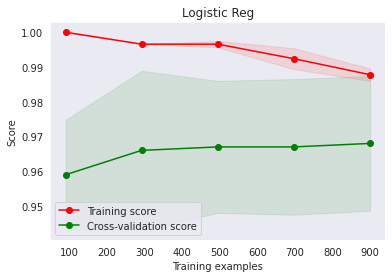

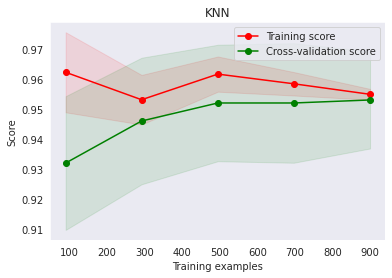

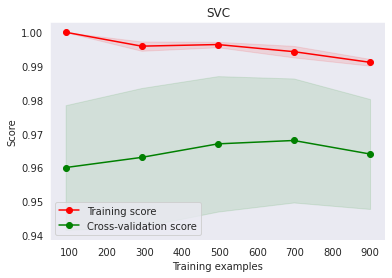

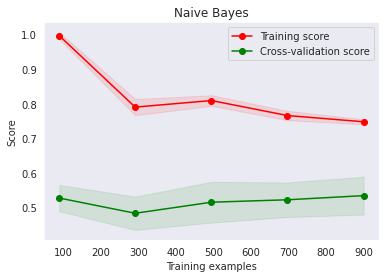

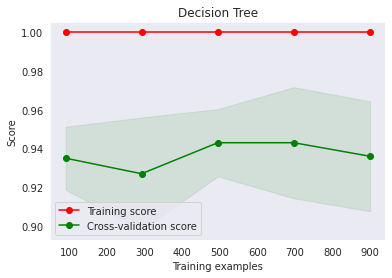

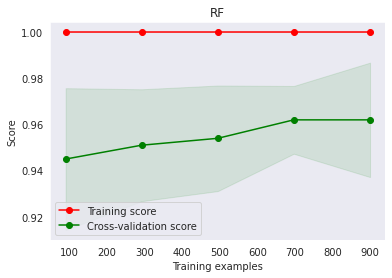

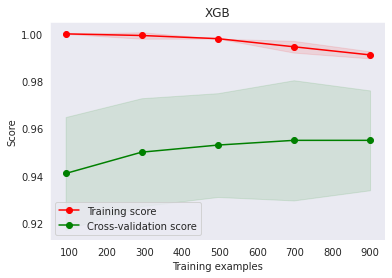

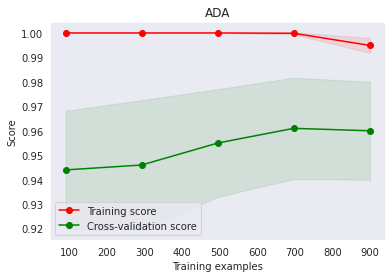

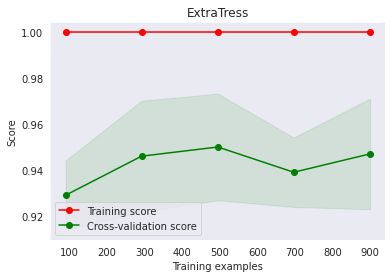

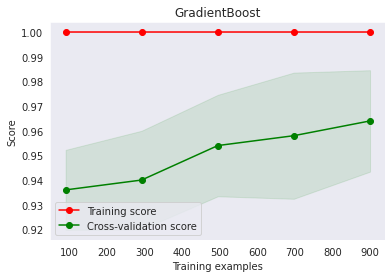

In [ ]:
#Learning curves for dataset with NLP
g = plot_learning_curve(LogisticRegression(random_state=42),"Logistic Reg",xNLP,y,cv=kfold)
g = plot_learning_curve(KNeighborsClassifier(n_neighbors=30),"KNN",xNLP,y,cv=kfold)
g = plot_learning_curve(SVC(random_state=42),"SVC",xNLP,y,cv=kfold)
g = plot_learning_curve(GaussianNB(),"Naive Bayes",xNLP,y,cv=kfold)
g = plot_learning_curve(DecisionTreeClassifier(random_state=42),"Decision Tree",xNLP,y,cv=kfold)
g = plot_learning_curve(RandomForestClassifier(random_state=42),"RF",xNLP,y,cv=kfold)
g = plot_learning_curve(XGBClassifier(random_state=42),"XGB",xNLP,y,cv=kfold)
g = plot_learning_curve(AdaBoostClassifier(random_state=42),"ADA",xNLP,y,cv=kfold)
g = plot_learning_curve(ExtraTreesClassifier(random_state=42),"ExtraTress",xNLP,y,cv=kfold)
g = plot_learning_curve(GradientBoostingClassifier(random_state=42),"GradientBoost",xNLP,y,cv=kfold)

In [ ]:
#Almost all of our models seem to fit the dataset nicely with a score of 0.9-1 for
#both the dataset except for the NaiveBayes in the NLP dataset which overfitted
#our dataset

#We will choose Random Forest, SVC, and AdaBoost for our basemodels and we will try to ensemble them ultimately with a Voting Classifier

# **Tuning the hyperparameters**


In [ ]:
from sklearn.model_selection import GridSearchCV
#Original hyperparameter tuning for RF
#rfparams = {'n_estimators':[50,100,200,300],'criterion':['gini','entropy'],'min_samples_split':[5,10,20,30,40],'max_features':[5,10,15,20]}
rf = RandomForestClassifier(random_state=42)
rfparams = {'n_estimators':[100,200,300],'min_samples_split':[2,5,10],'max_features':[5,10,15]}
gsrf = GridSearchCV(estimator = rf, param_grid=rfparams, scoring='accuracy',cv=10)
gsrf.fit(x,y)

rfNLP = RandomForestClassifier(random_state=42)
gsrfNLP = GridSearchCV(estimator = rfNLP, param_grid=rfparams, scoring='accuracy',cv=10)
gsrfNLP.fit(xNLP,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                 

In [ ]:
svcclassifier = SVC(probability=True,random_state=42)
#Original hyperparameters tuning of SVC
#svcparams = {'C':[1,1.5,2,2.5,3], 'kernel':['linear','poly','rbf','sigmoid'], 'degree':[2,3,4], 'gamma':[0.1,0.005,0.001]}

svcparams = {'C':[1,1.5,2], 'kernel':['rbf','sigmoid'], 'degree':[2,3], 'gamma':[0.1,0.005]}
gssvc = GridSearchCV(estimator = svcclassifier, param_grid=svcparams, scoring='accuracy',cv=10)
gssvc.fit(x,y)

svcNLP = SVC(probability=True,random_state=42)
gssvcNLP = GridSearchCV(estimator = svcNLP, param_grid=svcparams, scoring='accuracy',cv=10)
gssvcNLP.fit(xNLP,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 1.5, 2], 'degree': [2, 3],
                         'gamma': [0.1, 0.005], 'kernel': ['rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
ada = AdaBoostClassifier(random_state=42)
#initial hyperparameters tuning
#adaparams = {'n_estimators':[50,100,200,300],'learning_rate':[0.1,0.005,0.001], 'algorithm':['SAMME','SAMME.R']}
adaparams = {'n_estimators':[100,200,300],'learning_rate':[0.1,0.005]}
gsada = GridSearchCV(estimator = ada, param_grid=adaparams, scoring='accuracy',cv=10)
gsada.fit(x,y)

adaNLP = AdaBoostClassifier(random_state=42)
gsadaNLP = GridSearchCV(estimator = adaNLP, param_grid=adaparams, scoring='accuracy',cv=10)
gsadaNLP.fit(xNLP,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=42),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.005],
                         'n_estimators': [100, 200, 300]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

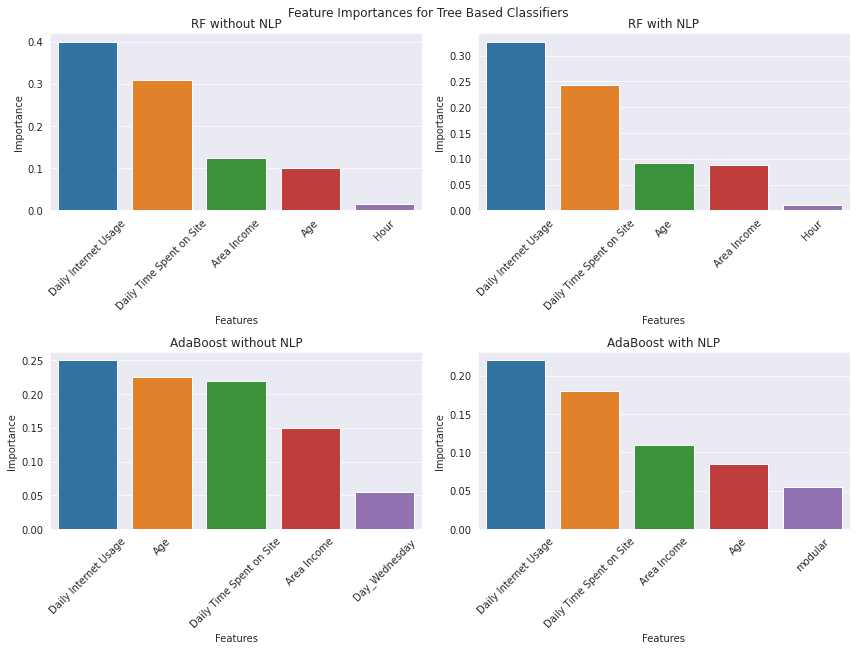

In [ ]:
g,axes = plt.subplots(2,2,figsize=(12,9))
sns.barplot(x=x.columns[pd.DataFrame(gsrf.best_estimator_.feature_importances_).nlargest(5,columns=0).index.tolist()],y=-np.sort(-gsrf.best_estimator_.feature_importances_)[0:5],ax=axes[0][0])
axes[0][0].set_xlabel('Features')
axes[0][0].set_ylabel('Importance')
axes[0][0].set_title('RF without NLP')
l1 = axes[0][0].set_xticklabels(axes[0][0].get_xticklabels(),rotation=45)

sns.barplot(x=xNLP.columns[pd.DataFrame(gsrfNLP.best_estimator_.feature_importances_).nlargest(5,columns=0).index.tolist()],y=-np.sort(-gsrfNLP.best_estimator_.feature_importances_)[0:5],ax=axes[0][1])
axes[0][1].set_xlabel('Features')
axes[0][1].set_ylabel('Importance')
axes[0][1].set_title('RF with NLP')
l2 = axes[0][1].set_xticklabels(axes[0][1].get_xticklabels(),rotation=45)

sns.barplot(x=x.columns[pd.DataFrame(gsada.best_estimator_.feature_importances_).nlargest(5,columns=0).index.tolist()],y=-np.sort(-gsada.best_estimator_.feature_importances_)[0:5],ax=axes[1][0])
axes[1][0].set_xlabel('Features')
axes[1][0].set_ylabel('Importance')
axes[1][0].set_title('AdaBoost without NLP')
l3 = axes[1][0].set_xticklabels(axes[1][0].get_xticklabels(),rotation=45)

sns.barplot(x=xNLP.columns[pd.DataFrame(gsadaNLP.best_estimator_.feature_importances_).nlargest(5,columns=0).index.tolist()],y=-np.sort(-gsadaNLP.best_estimator_.feature_importances_)[0:5],ax=axes[1][1])
axes[1][1].set_xlabel('Features')
axes[1][1].set_ylabel('Importance')
axes[1][1].set_title('AdaBoost with NLP')
l4 = axes[1][1].set_xticklabels(axes[1][1].get_xticklabels(),rotation=45)

g.tight_layout()
t = g.suptitle("Feature Importances for Tree Based Classifiers",y=1)


In [ ]:
#The highest contributing feature among the 4 models is the Daily Internet usage

# **Ensemble Model**

In [ ]:
#We will use VotingClassifier

from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=[('RandomForest', gsrf.best_estimator_), ('SVC', gssvc.best_estimator_),
('AdaBoost', gsada.best_estimator_)], voting='soft', n_jobs=-1)
vc.fit(x,y)

vcNLP = VotingClassifier(estimators=[('RandomForest', gsrfNLP.best_estimator_), ('SVC', gssvcNLP.best_estimator_),
('AdaBoost', gsadaNLP.best_estimator_)], voting='soft', n_jobs=-1)
vcNLP.fit(xNLP,y)

VotingClassifier(estimators=[('RandomForest',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=15,
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=5,
                                                     min_weight_fraction_leaf=0.0,
  

In [ ]:
#Score and std of the meta model without NLP
accuracy = cross_val_score(estimator=vc,X=x,y=y,cv=kfold, scoring='accuracy')
vcmean = accuracy.mean()
vcstd = accuracy.std()
accuracyNLP = cross_val_score(estimator=vcNLP,X=xNLP,y=y,cv=kfold, scoring='accuracy')
vcnlpmean = accuracyNLP.mean()
vcnlpstd = accuracyNLP.std()

finalresult = pd.DataFrame({'Dataset':['Without NLP', 'With NLP'],'Accuracies Mean':[vcmean,vcnlpmean],'Accuracies Std':[vcstd,vcnlpstd]})


In [ ]:
finalresult

,Dataset,Accuracies Mean,Accuracies Std
0,Without NLP,0.968,0.020881
1,With NLP,0.973,0.016763


In [ ]:
#Comparing it with the initial model selection
finaltable = cvresults.loc[cvresults['Mean Accuracy'].nlargest(5).index]
finaltable.reset_index(drop=True,inplace=True)
finaltable.loc[len(finaltable)] = ['Ensembled Model',vcmean,vcstd,vcnlpmean,vcnlpstd]

In [ ]:
finaltable

,Algorithm,Mean Accuracy,std Accuracy,Mean NLP Accuracy,std NLP Accuracy
0,Logistic Regression,0.970,0.021909,0.968,0.019391
1,Random Forest,0.967,0.018466,0.962,0.024819
2,Extra Trees,0.965,0.023770,0.947,0.024104
3,SVC,0.963,0.019519,0.964,0.016248
4,AdaBoost,0.958,0.019900,0.960,0.020000
5,Ensembled Model,0.968,0.020881,0.973,0.016763


In [ ]:
#By using ensembling technique (Voting) and NLP, we greatly improved out score and our standard deviation!